In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('heart_attack_risk_prediction_1.csv')
data

,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Heart_Attack_History,Heart_Attack_Risk
0,42,0,0,0,1,1,0,0,9,248,125,93,119,1,0,4,0,0
1,26,1,0,0,0,0,1,1,4,272,51,134,115,0,0,7,0,0
2,78,1,0,0,1,0,0,1,6,268,213,104,117,0,1,10,0,0
3,58,1,1,0,1,0,0,1,9,224,250,91,65,0,0,1,1,0
4,22,1,0,0,0,0,0,1,5,277,129,141,109,0,0,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,0,0,0,0,1,0,1,6,160,238,133,74,1,1,10,0,0
9996,34,0,0,0,0,0,0,0,5,257,241,124,78,0,1,1,0,1
9997,76,1,0,0,0,0,0,0,2,205,69,151,98,1,0,1,1,0
9998,52,1,0,0,0,0,0,1,5,155,288,127,60,1,0,7,0,0


In [15]:
x = data.drop(columns=['Heart_Attack_Risk'])
y = data['Heart_Attack_Risk']
x.shape, y.shape

((10000, 17), (10000,))

In [17]:
# Applying Train-test split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

### Training a simple DecisionTreeClassifier model

Accuracy: 0.5793333333333334
Precision: 0.30209481808158767
Recall: 0.3034330011074197
F1 Score: 0.3027624309392265
ROC AUC Score: 0.5007866006967714

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      2097
           1       0.30      0.30      0.30       903

    accuracy                           0.58      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.58      0.58      0.58      3000



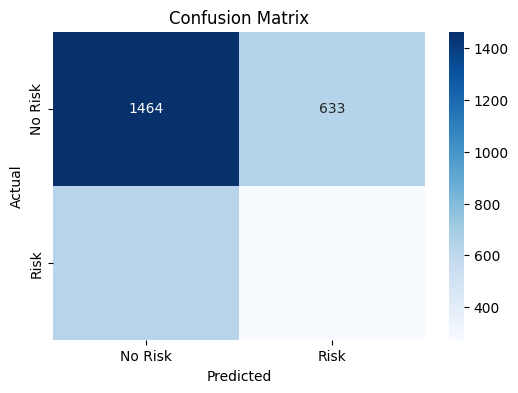

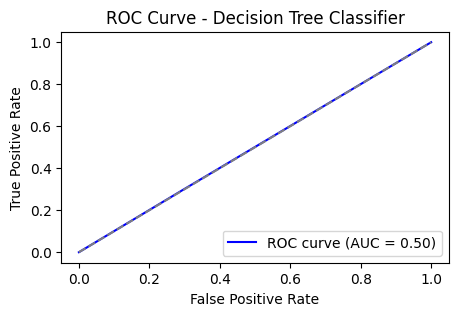

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix

# Initializing and training the model
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluation on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4896
           1       1.00      1.00      1.00      2104

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



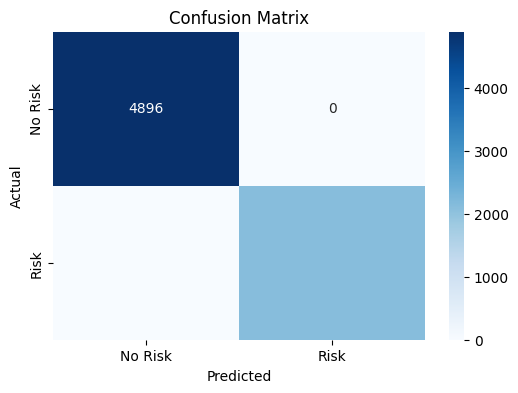

In [60]:
# Evaluation on train data

y_pred_train = model.predict(X_train)
y_proba_train = model.predict_proba(X_train)[:, 1]  # For ROC AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- The model is overfitting on train data, which mean to be that the model is learning the data to it's depth

- To avoid this overfitting, let's try and apply Grid Search Cross Validation, which helps us in hyperparameter tuning, so that we can find the best hyperparaeters to pass to the model, and this might helps us to avoid the overfitting

### Grid Search Cross Validation on Decision Tree Classifier

In [27]:

## Grid Search CV - Grid Search Cross Validation (CV) is a systematic way to find the best combination of hyperparameters for a model.
#                 - Automates the tuning process instead of relying on manual adjustments.
#                 - finds the best set of hyperparameters that maximize model performance.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Model
dt_model = DecisionTreeClassifier(random_state=42)

# Setting up the parameter grid to search over
param_grid={
    'max_depth':[9,11,13,15],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[1,2,3,4,5]
    # 'max_features':[2,3,4,5]
}

# Perform Grid Search with 5-fold cross-validation

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Output the best max_depth
print("Best max_depth:", grid_search.best_params_['max_depth'])
# Output the best min_samples_split
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])
# Output the best min_samples_leaf
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])


# Retrieve the best model
best_dt_model = grid_search.best_estimator_


Best max_depth: 15
Best min_samples_split: 2
Best min_samples_leaf: 1


### - So we got the tuned hyperparameters, and now we're gonna train the model again using these hyperparameters


Accuracy: 0.508
Precision: 0.2986647926914968
Recall: 0.4706533776301218
F1 Score: 0.3654342218400688
ROC AUC Score: 0.5053314047225614

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.52      0.60      2097
           1       0.30      0.47      0.37       903

    accuracy                           0.51      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.58      0.51      0.53      3000



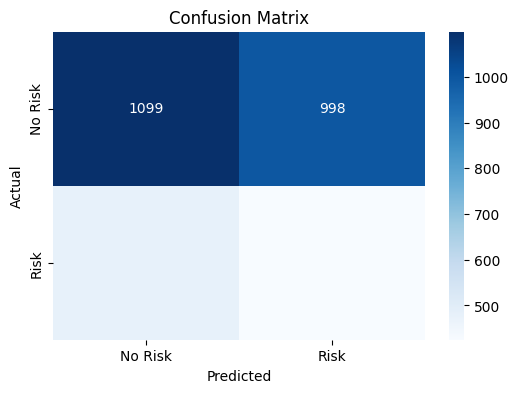

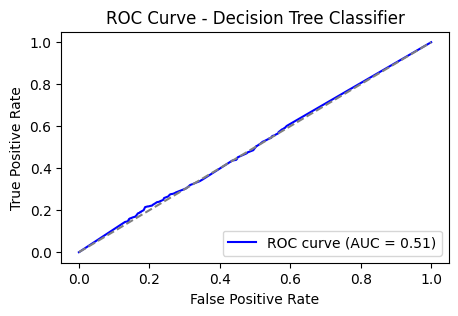

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Use the best hyperparameters
final_model = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Fit on the entire training set
final_model.fit(X_train, y_train)

# Now make predictions and evaluate
y_pred_test = final_model.predict(X_test)
y_proba_test = final_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

Test Set (Generalization Performance):

- Recall improved slightly for the minority class (class 1) after tuning — this is valuable since we're      interested in identifying more true positives (i.e., risky cases).

- Other metrics are still low, but the increase in recall shows our model is picking up more of the risky    class than before.

Accuracy: 0.7872857142857143
Precision: 0.5930408472012103
Recall: 0.9315589353612167
F1 Score: 0.7247180624884452
ROC AUC Score: 0.9285522906881384

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83      4896
           1       0.59      0.93      0.72      2104

    accuracy                           0.79      7000
   macro avg       0.78      0.83      0.78      7000
weighted avg       0.85      0.79      0.80      7000



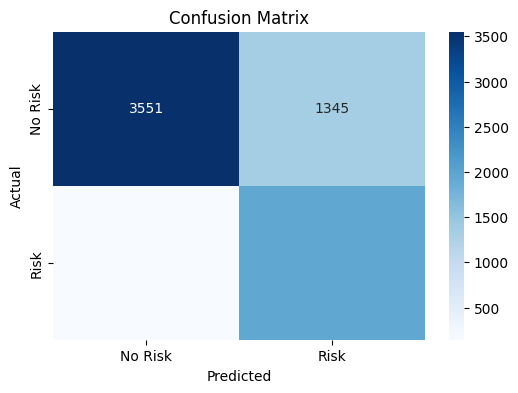

In [103]:
# Predictions on training data
y_train_pred = final_model.predict(X_train)
y_train_proba = final_model.predict_proba(X_train)[:, 1]  # For ROC AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_train_proba))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Train Set (Over came the issue of Overfitting):**

- Earlier, the model had perfect scores, which clearly indicated overfitting.

- Now, after applying constraints (max_depth=15, etc.), the training performance is more realistic —         accuracy ~78%, F1 ~72%, which means our model has better generalization and less overfitting.

## Random Forest Classifier

- Now, let's train the RandomForestClassifier, and look into it's performance

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid to search over
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [9, 11, 13, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
    # can optionally add 'max_features': ['auto', 'sqrt', 'log2'] here
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])

# Retrieve the best model
best_rf_model = grid_search.best_estimator_


Best n_estimators: 100
Best max_depth: 13
Best min_samples_split: 2
Best min_samples_leaf: 1


Accuracy: 0.5236666666666666
Precision: 0.30576070901033975
Recall: 0.4584717607973422
F1 Score: 0.36685866194062916
ROC AUC Score: 0.49783876243602765

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62      2097
           1       0.31      0.46      0.37       903

    accuracy                           0.52      3000
   macro avg       0.50      0.51      0.49      3000
weighted avg       0.58      0.52      0.54      3000



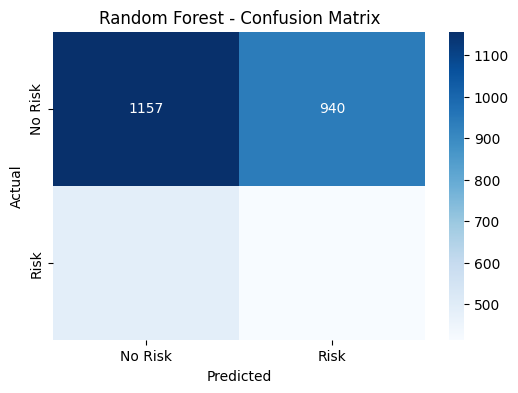

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=13,  
    min_samples_split=7,
    min_samples_leaf=3,
    max_features='sqrt',  # to introduce randomness and improve generalization.
    class_weight={0: 1, 1: 3}, # to give more weight to the minority class.
    bootstrap=False,  # to use the entire dataset for training each tree, which may help recall.
    criterion='entropy',
    random_state=42
)
rf_model.fit(X_train, y_train)

# predictions on the test set
y_pred_test = rf_model.predict(X_test)
y_proba_test = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


Accuracy: 0.7764285714285715
Precision: 0.5734532570182611
Recall: 1.0
F1 Score: 0.7289104451758185
ROC AUC Score: 0.937491554368896

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81      4896
           1       0.57      1.00      0.73      2104

    accuracy                           0.78      7000
   macro avg       0.79      0.84      0.77      7000
weighted avg       0.87      0.78      0.79      7000



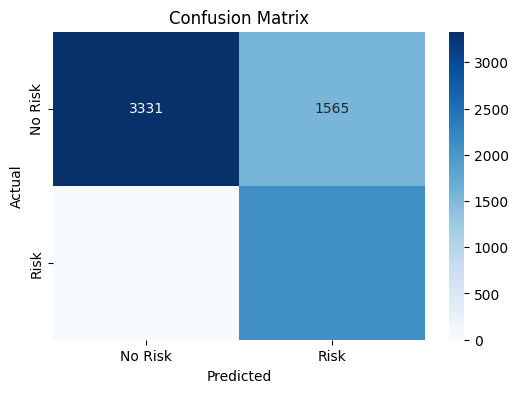

In [107]:
# Evaluating train set
y_pred_train = rf_model.predict(X_train)
y_proba_train = rf_model.predict_proba(X_train)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*- In our use case — heart attack risk prediction — recall is important because:*

*- We want to minimize false negatives, i.e., avoid missing people who are actually at risk.*

- Need to try and look at better things 🥱😐

In [68]:
vc_train_data = y_train.value_counts()
vc_train_data

Heart_Attack_Risk
0    4896
1    2104
Name: count, dtype: int64

In [72]:
vc_test_data = y_test.value_counts()
vc_test_data

Heart_Attack_Risk
0    2097
1     903
Name: count, dtype: int64

## SMOTE

- SMOTE (Synthetic Minority Oversampling Technique) is a powerful method used to handle imbalanced datasets in machine learning. 

- It helps improve model performance by generating synthetic samples for the minority class rather than simply duplicating existing ones.

#### How SMOTE Works

1️⃣ Identify the Minority Class → Finds the class with fewer samples (e.g., "Heart Attack Risk" in your dataset). 

2️⃣ Select Nearest Neighbors → Chooses a few nearest neighbors of a minority class sample. 

3️⃣ Generate Synthetic Samples → Creates new data points between existing minority samples using interpolation. 

4️⃣ Balance the Dataset → Adds these synthetic samples to the dataset, making the class distribution more even.

#### Why SMOTE is Useful...?

- Improves Recall → Helps the model detect more minority class instances.

- Reduces Bias → Prevents the model from favoring the majority class.

- Enhances Generalization → Avoids overfitting by introducing diversity in the minority class.

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Heart_Attack_Risk
0    4896
1    2104
Name: count, dtype: int64
After SMOTE: Heart_Attack_Risk
1    4896
0    4896
Name: count, dtype: int64


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [117]:
# Fit the best model again on balanced data

# Initializing and training the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=13,  
    min_samples_split=7,
    min_samples_leaf=3,
    max_features='sqrt',  # to introduce randomness and improve generalization.
    class_weight={0: 1, 1: 3}, # to give more weight to the minority class.
    bootstrap=False,  # to use the entire dataset for training each tree, which may help recall.
    criterion='entropy',
    random_state=42
)

rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_test = rf_model.predict(X_test)
y_proba_test = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
# from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Accuracy: 0.4503333333333333
Precision: 0.29392265193370165
Recall: 0.5891472868217055
F1 Score: 0.392185772207888
ROC AUC Score: 0.4918168706969984

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.39      0.50      2097
           1       0.29      0.59      0.39       903

    accuracy                           0.45      3000
   macro avg       0.49      0.49      0.45      3000
weighted avg       0.57      0.45      0.47      3000



In [112]:
# Predict on train data
y_pred_train = best_rf_model.predict(X_train)
y_proba_train = rf_model.predict_proba(X_train)[:, 1]

# Evaluate
# from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

Accuracy: 0.8654285714285714
Precision: 1.0
Recall: 0.5522813688212928
F1 Score: 0.711573790569504
ROC AUC Score: 0.937491554368896

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      4896
           1       1.00      0.55      0.71      2104

    accuracy                           0.87      7000
   macro avg       0.92      0.78      0.81      7000
weighted avg       0.89      0.87      0.85      7000



#### Why SMOTE Might Not Help in Random Forest:
- Random Forest is robust to class imbalance to some extent.

- Synthetic samples may lead to overfitting, particularly in tree-based models like RF, which are already prone to memorizing data.

- If the synthetic points are too close or noisy, the decision trees might split on uninformative features.

In [ ]:
# Checking feature importance

In [93]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False)


Triglyceride_Level        0.111068
Cholesterol_Level         0.107124
Systolic_BP               0.101745
Diastolic_BP              0.100369
Age                       0.094233
Stress_Level              0.072059
Diet_Score                0.065984
Alcohol_Consumption       0.048431
Smoking                   0.045168
Obesity                   0.042666
Air_Pollution_Exposure    0.038689
Physical_Activity         0.034240
Family_History            0.032000
Gender                    0.031293
Hypertension              0.030519
Heart_Attack_History      0.023622
Diabetes                  0.020791
dtype: float64

## XG Boost Classifier

In [29]:
x = data.drop(columns=['Heart_Attack_Risk'])
y = data['Heart_Attack_Risk']
x.shape, y.shape

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train1, y_train1)
best_xgb_model = grid_search.best_estimator_
best_xgb_model

C:\Users\rohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate class imbalance ratio
scale_pos_weight = np.sum(y_train1 == 0) / np.sum(y_train1 == 1)
print('Class Imbalance Ratio: ', scale_pos_weight)

# Define the XGBoost model with tuned hyperparameters
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train1, y_train1)

# Predict on the test set
y_pred_test = xgb_model.predict(X_test1)

# Evaluate the model
print("Model Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test1, y_pred_test))
print("Precision:", precision_score(y_test1, y_pred_test))
print("Recall:", recall_score(y_test1, y_pred_test))
print("F1 Score:", f1_score(y_test1, y_pred_test))
print("ROC AUC Score:", roc_auc_score(y_test1, y_pred_test))

print("\n Classification Report:\n", classification_report(y_test1, y_pred_test))


Class Imbalance Ratio:  2.326996197718631
Model Evaluation on Test Data:
Accuracy: 0.4816666666666667
Precision: 0.2907573812580231
Recall: 0.5016611295681063
F1 Score: 0.3681430312880943
ROC AUC Score: 0.4873589386514828

 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56      2097
           1       0.29      0.50      0.37       903

    accuracy                           0.48      3000
   macro avg       0.49      0.49      0.46      3000
weighted avg       0.57      0.48      0.50      3000



C:\Users\rohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [131]:
# Predict on the train set
y_pred_train = xgb_model.predict(X_train1)

# Evaluate the model
print("Model Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_train1, y_pred_train))
print("Precision:", precision_score(y_train1, y_pred_train))
print("Recall:", recall_score(y_train1, y_pred_train))
print("F1 Score:", f1_score(y_train1, y_pred_train))
print("ROC AUC Score:", roc_auc_score(y_train1, y_pred_train))

print("\n Classification Report:\n", classification_report(y_train1, y_pred_train))

Model Evaluation on Test Data:
Accuracy: 0.5411428571428571
Precision: 0.35115529285330466
Recall: 0.6211977186311787
F1 Score: 0.4486783384826639
ROC AUC Score: 0.563968957354805

 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61      4896
           1       0.35      0.62      0.45      2104

    accuracy                           0.54      7000
   macro avg       0.55      0.56      0.53      7000
weighted avg       0.63      0.54      0.56      7000



### Adaboost Classifier

In [32]:
from sklearn.ensemble  import AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Define AdaBoost model
ada_model = AdaBoostClassifier(
    n_estimators=250,
    learning_rate=0.3,
    random_state=42
)

# n_estimators: The number of weak classifiers to be combined
# learning_rate: Controls the contribution of each classifier
# DecisionTreeClassifier(max_depth=1) --> This is the default base estimator used by AdaBoostClassifier

# Train the model
ada_model.fit(X_train, y_train)

# Predict on test set
y_pred_ada = ada_model.predict(X_test)

# Predict probabilities for ROC AUC
y_prob_ada = ada_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Adaboost Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

Adaboost Evaluation on Test Data:
Accuracy: 0.699
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5039971672869168

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      2097
           1       0.00      0.00      0.00       903

    accuracy                           0.70      3000
   macro avg       0.35      0.50      0.41      3000
weighted avg       0.49      0.70      0.58      3000



C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklea

In [40]:
# Predict on the train set
y_pred_train_ada = ada_model.predict(X_train)

# Evaluate the model
print("Model Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_ada))
print("Precision:", precision_score(y_train, y_pred_train_ada))
print("Recall:", recall_score(y_train, y_pred_train_ada))
print("F1 Score:", f1_score(y_train, y_pred_train_ada))
print("ROC AUC Score:", roc_auc_score(y_train, y_pred_train_ada))

print("\n Classification Report:\n", classification_report(y_train, y_pred_train_ada))

Model Evaluation on Test Data:
Accuracy: 0.6994285714285714
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

 Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      4896
           1       0.00      0.00      0.00      2104

    accuracy                           0.70      7000
   macro avg       0.35      0.50      0.41      7000
weighted avg       0.49      0.70      0.58      7000



C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\anaconda3\Lib\site-packages\sklea

- that output confirms it — your AdaBoost model has fully collapsed into predicting only the majority class (0).

**Final Note (Real Talk):**

- At this point, every model — Decision Tree, Random Forest, XGBoost, SVM, AdaBoost — has shown the same bottleneck: the class imbalance is so strong that no model is learning to meaningfully capture class 1 ("risky").